<a href="https://colab.research.google.com/github/showbeet10/Plant-Disease-Detector/blob/main/Copy_of_Crop_detection_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install -q gdown
!gdown --id 1Knxd_oOhbIMBSHAywaNimxeKLpkFPA56 --output plantvillage.zip


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Knxd_oOhbIMBSHAywaNimxeKLpkFPA56
From (redirected): https://drive.google.com/uc?id=1Knxd_oOhbIMBSHAywaNimxeKLpkFPA56&confirm=t&uuid=4c4c4ab8-6972-4d64-ba60-46ac49348ec7
To: /content/plantvillage.zip
100% 690M/690M [00:07<00:00, 96.6MB/s]


In [ ]:

!ls -lh plantvillage.zip


-rw-r--r-- 1 root root 658M Jul 12 18:48 plantvillage.zip


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("plantvillage.zip",'r') as zip_ref:
  zip_ref.extractall('plant_dataset')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# import os

# len(os.listdir("/content/plant_dataset/PlantVillage"))


In [ ]:
data_dir = "/content/plant_dataset/PlantVillage"

img_size=128
batch_size=32


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
#Loading the training data

train_data =datagen.flow_from_directory(
    data_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 16516 images belonging to 15 classes.


In [ ]:
#validtion data

val_data=datagen.flow_from_directory(
    data_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4122 images belonging to 15 classes.


In [ ]:
#printing total disease types
print("total classes: ", train_data.num_classes)

total classes:  15


In [ ]:
#class labels
print("Class labels: ", train_data.class_indices)

Class labels:  {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}


In [ ]:
#total images
print("Training images: ", train_data.samples)
print("Validation images: ", val_data.samples)

Training images:  16516
Validation images:  4122


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x= base_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)
x=Dense(128, activation='relu')(x)
x=Dropout(0.2)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5 # We can increase to 10 or more for better accuracy
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 489s 916ms/step - accuracy: 0.5618 - loss: 1.4140 - val_accuracy: 0.8202 - val_loss: 0.5439
Epoch 2/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 395s 760ms/step - accuracy: 0.7841 - loss: 0.6484 - val_accuracy: 0.8617 - val_loss: 0.4305
Epoch 3/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 391s 756ms/step - accuracy: 0.8009 - loss: 0.5861 - val_accuracy: 0.8709 - val_loss: 0.3822
Epoch 4/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 456s 883ms/step - accuracy: 0.8228 - loss: 0.5206 - val_accuracy: 0.8569 - val_loss: 0.4100
Epoch 5/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 385s 744ms/step - accuracy: 0.8350 - loss: 0.4881 - val_accuracy: 0.8709 - val_loss: 0.3850
Epoch 6/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 390s 754ms/step - accuracy: 0.8371 - loss: 0.4704 - val_accuracy: 0.8831 - val_loss: 0.3585
Epoch 7/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 439s 749ms/step - accuracy: 0.8349 - loss: 0.4766 - val_accuracy: 0.8848 - val_loss: 0.3348
Epoch 8/8
517/517 ━━━━━━━━━━━━━━━━━━━━ 381s 737ms/step - accuracy: 0.8441 - loss: 0

In [ ]:
import matplotlib.pyplot as plt

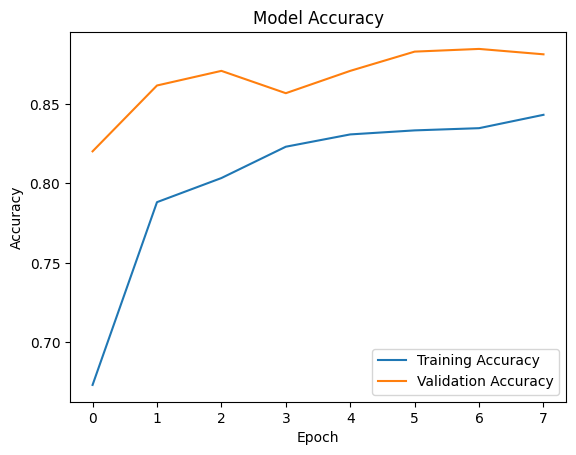

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

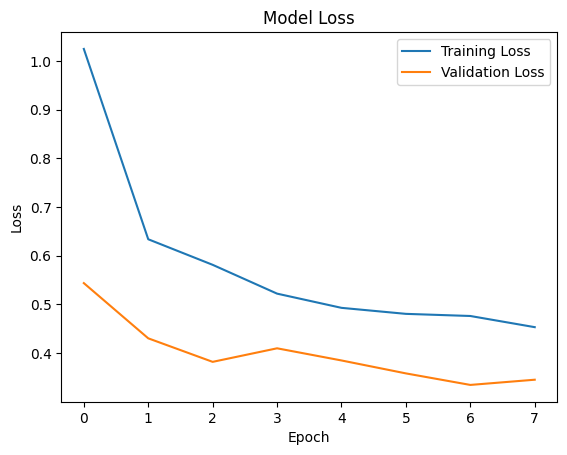

In [ ]:
#Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving leaf detect.JPG to leaf detect.JPG


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img_path=list(uploaded.keys())[0]
img=image.load_img(img_path, target_size=(128,128))
img_array=image.img_to_array(img)
img_array=img_array/255.0
img_array=np.expand_dims(img_array,axis=0)

In [ ]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

print("Predicted Disease:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Disease: Potato___Late_blight


In [ ]:
disease_treatment = {
    'Apple___Black_rot': 'Use fungicide sprays; remove infected fruit and leaves.',
    'Apple___healthy': ' No disease detected. Keep regular monitoring.',
    'Corn___Common_rust': 'Apply rust-resistant hybrids and fungicides.',
    'Grape___Black_rot': ' Apply Bordeaux mixture; prune infected parts.',
    'Tomato___Late_blight': ' Use copper-based fungicides; remove infected plants.',
    'Tomato___Leaf_Mold': ' Ensure air circulation; use protective fungicides.',
    'Tomato___healthy': ' Plant is healthy.',
    'Potato___Early_blight': ' Use certified seed; apply fungicide early.',
    'Potato___Late_blight': ' Remove and destroy infected plants; apply metalaxyl.',
    'Strawberry___Leaf_scorch': ' Use resistant varieties; remove affected leaves.',

}

treatment = disease_treatment.get(predicted_class, "No treatment info available.")
print("Recommended Treatment:", treatment)


Recommended Treatment:  Remove and destroy infected plants; apply metalaxyl.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
val_steps = val_data.samples // val_data.batch_size +1

y_pred=[]
y_true=[]

for i in range(val_steps):
  X_batch , y_batch = next(val_data)
  preds=model.predict(X_batch)
  y_pred.extend(np.argmax(preds,axis=1))
  y_true.extend(np.argmax(y_batch,axis=-1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [ ]:
from sklearn.metrics import classification_report
class_labels=list(train_data.class_indices.keys())

print("Classification Report:\n")


print(classification_report(y_true,y_pred,target_names=class_labels))

Classification Report:

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.95      0.93      0.94       199
                     Pepper__bell___healthy       0.95      0.98      0.97       295
                      Potato___Early_blight       0.95      0.97      0.96       200
                       Potato___Late_blight       0.91      0.89      0.90       200
                           Potato___healthy       0.93      0.87      0.90        30
                      Tomato_Bacterial_spot       0.89      0.92      0.91       425
                        Tomato_Early_blight       0.73      0.68      0.70       200
                         Tomato_Late_blight       0.84      0.91      0.87       381
                           Tomato_Leaf_Mold       0.78      0.87      0.82       190
                  Tomato_Septoria_leaf_spot       0.87      0.80      0.83       354
Tomato_Spider_mites_Two_spotted_spider_m

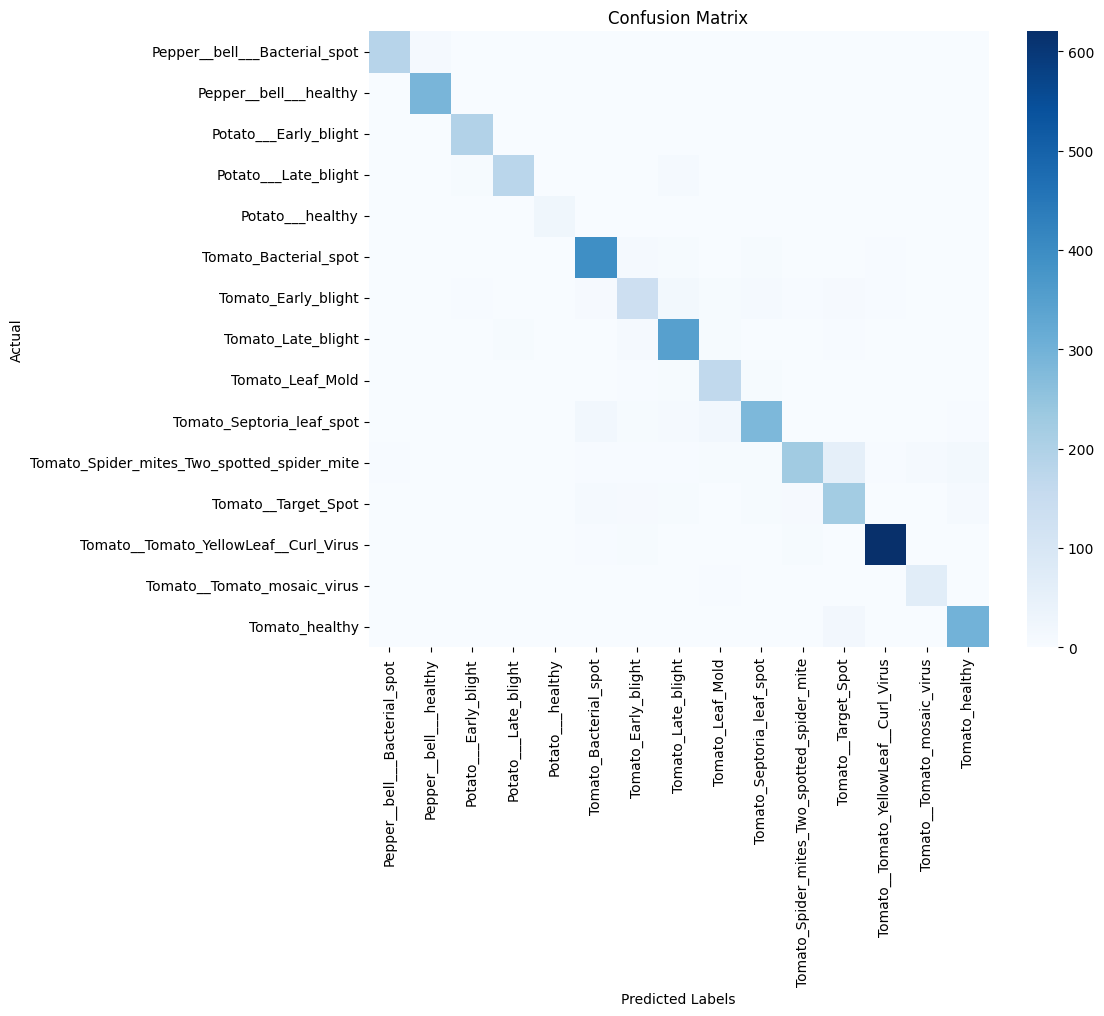

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm =confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=False,cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("Manual Accuracy:", accuracy_score(y_true, y_pred))


Manual Accuracy: 0.8823386705482775


In [ ]:
model.save("plant_disease_model.h5")

In [ ]:
from google.colab import files
files.download('plant_disease_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>